# Dummy Variables

You saw in the earlier notebook that you weren't able to directly add a categorical variable to your multiple linear regression model. In this notebook, you will get some practice adding dummy variables to your models and interpreting the output.

Let's start by reading in the necessary libraries and data.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [3]:
df['neighborhood'].value_counts()

B    2427
A    1876
C    1725
Name: neighborhood, dtype: int64

In [4]:
df['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

### 1. Use the `pd.get_dummies` documentation to assist you with obtaining dummy variables for the neighborhood column. Then use join to add the dummy variables to your dataframe,` df`, and store the joined results in `df_new`.

Fit a linear model using all three levels of neighborhood neighborhood to predict the price. Don't forget an intercept.

Use your results to answer quiz 1 below.


In [5]:
# Copying
df_new = df.copy()

# Creating the dummies variables for neighborhood.
neighborhood_dum = pd.get_dummies(df['neighborhood'])

# Creating the dummies variables for style.
style_dum = pd.get_dummies(df['style'])

In [6]:
df_new[['A', 'B', 'C']] = neighborhood_dum

df_new[['lodge','ranch','victorian']] = style_dum

In [7]:
# Adding the intercept.
df_new['intercept'] = 1

# Creating the object
lm = sm.OLS(df['price'],df_new[['intercept','A','B','C']])

# Calculating the multiple linear model
results = lm.fit()

# Printing the results using the summary.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sun, 11 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:55:01   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.381e+05   4439.653    121.210      0.000    5.29e+05    5.47e+05
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B           5.325e+05   7894.313     67.448      0.000    5.17e+05    5.48e+05
C           2669.4717   8925.271      0.299      0.765   -1.48e+04    2.02e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                     3.67e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 2. Now, fit an appropriate linear model for using neighborhood to predict the price of a home. Use neighborhood `A` as your baseline. Use your resulting model to answer the questions in Quiz 2 and Quiz 3 below.

In [8]:
# Creating the object
lm = sm.OLS(df['price'],df_new[['intercept','B','C']])

# Calculating the multiple linear model
results = lm.fit()

# Printing the results using the summary.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sun, 11 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:55:01   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Coef C < Coef A < Coef B
print("Coef A: ", 5.411e+05)
print("Coef B: ", 5.411e+05 + 5.295e+05)
print("Coef C: ", 5.411e+05 - 332.3594)

Coef A:  541100.0
Coef B:  1070600.0
Coef C:  540767.6406


### 3. Run the two cells below to look at the home prices for the `A` and `C` neighborhoods. Add neighborhood `B`. This creates a glimpse into the differences that you found in the previous linear model.


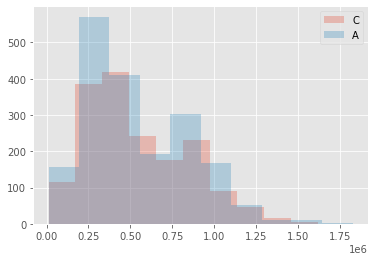

In [10]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

### 4. Now, add dummy variables for the `style of house`, as well as `neighborhood`. Use `ranch` as the baseline for the style. Additionally, add bathrooms and bedrooms to your linear model. Don't forget an intercept. Use the results of your linear model to answer the last two questions below. Home pricess are measured in dollars, and this dataset is not real.

To minimize scrolling, it might be useful to open another browser window to this concept to answer the quiz questions.

In [11]:
# Creating the object
lm_q4 = sm.OLS(df_new['price'],df_new[['intercept', 'B', 'C', 'lodge', 'victorian', 'bedrooms', 'bathrooms']])

# Calculating the multiple linear model
results_q4 = lm_q4.fit()

# Printing the results using the summary.
results_q4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Sun, 11 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:55:01   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Coefficients - Using A as baseline

In [12]:
# Using A as baseline.
print("Coef A: ",-3.833e+05)
print("Coef B: ", -3.833e+05 + 5.229e+05)
print("Coef C: ", -3.833e+05 -7168.6285)

Coef A:  -383300.0
Coef B:  139600.0
Coef C:  -390468.6285


In [13]:
# Using ranch as baseline.
print("Ranch: ",-3.833e+05)
print("lodge: ", -3.833e+05 + 1.685e+05)
print("victorian: ", -3.833e+05 + 7.056e+04)

Ranch:  -383300.0
lodge:  -214800.0
victorian:  -312740.0
